# HW 5

### Rest API 

In this task we want to extract all the prize motivations from the JSON-list and visualise the frequencies using a word cloud. 

In [1]:
# Importing
import requests 
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# access url
url = 'https://api.nobelprize.org/2.1/nobelPrizes'

# set query parameters 
params = {"sort" : "desc", "nobelPrizeCategory" : "phy" }

# send request to api with parameters 
response = requests.get(url, params)
# parse api response into json format
data = response.json()

# extract nobelPrizes list from JSON data 
data_list = data["nobelPrizes"]
data_list[0]

{'awardYear': '2024',
 'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'},
 'categoryFullName': {'en': 'The Nobel Prize in Physics',
  'no': 'Nobelprisen i fysikk',
  'se': 'Nobelpriset i fysik'},
 'dateAwarded': '2024-10-08',
 'prizeAmount': 11000000,
 'prizeAmountAdjusted': 11000000,
 'links': [{'rel': 'nobelPrize',
   'href': 'https://api.nobelprize.org/2/nobelPrize/phy/2024',
   'action': 'GET',
   'types': 'application/json'}],
 'laureates': [{'id': '1037',
   'knownName': {'en': 'John J. Hopfield'},
   'fullName': {'en': 'John J. Hopfield'},
   'portion': '1/2',
   'sortOrder': '1',
   'motivation': {'en': 'for foundational discoveries and inventions that enable machine learning with artificial neural networks',
    'se': 'för grundläggande upptäckter och uppfinningar som möjliggör maskininlärning med artificiella neuronnätverk'},
   'links': [{'rel': 'laureate',
     'href': 'https://api.nobelprize.org/2/laureate/1037',
     'action': 'GET',
     'types': 'application/

Next we want to extract the motivations from the list data_list and visualize in a word cloud. 

In [3]:
# Import stopwords from wordcloud 
from wordcloud import WordCloud, STOPWORDS

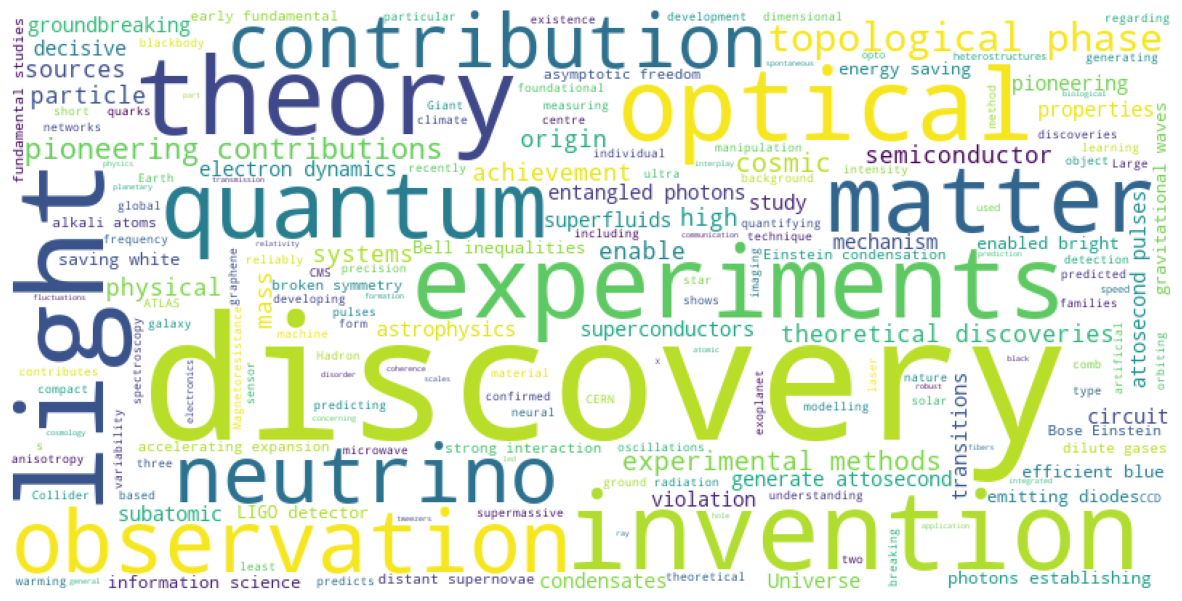

In [4]:
pm = []  # init list to store motivational words

# extracting the prize motivations
for i in data_list:
    if 'laureates' in i:
        for laureate in i['laureates']:
            motivation = laureate.get('motivation', {}).get('en')  # extract the motivation
            if motivation:  # check if a motivation exists, 
                pm.append(motivation)   # then append to list


# stopwords 
stopwords = set(STOPWORDS)
pm_joint = " ".join(pm)


# create a WordCloud object
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords = stopwords,
).generate(pm_joint)

# display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Web Scraping

In [23]:
from bs4 import BeautifulSoup
import requests

We start with defining some functions to search table for upc and values and then to find the star-rating and names. 

In [42]:
# Function to find upc and value from table
def search_table(soup):
    rows = soup.find_all("tr")
    
    upc = None
    price = None
    
    for row in rows: 
        header = row.find("th").text.strip()
        value = row.find("td").text.strip()
        
        if header == 'UPC': 
            upc = value
        elif header == 'Price (excl. tax)': 
            price = value
    return upc, price

In [43]:
# Function to find name and star rating
def find_rating_and_name(soup): 
    title = soup.find('h1').text
    rating = soup.find(class_ = 'star-rating')
    star_rating = rating['class'][1]
    return title, star_rating  

Next we must iterate over the books and summarize into a dataframe. 

In [44]:
url = "https://books.toscrape.com/" #url to scrape

book_data = [] #init empty book list

for i in range(1,4): 
    curr_url = url + "/catalogue/page-" + str(i) + ".html"
    r = requests.get(curr_url)
    soup = BeautifulSoup(r.content, 'html.parser')
    b_list = soup.find_all('a', href=True, title=True)
    
    for book in b_list: 
        book_links = book['href']
        book_url = url + "/catalogue/" + book_links
        
        req_sub = requests.get(book_url)
        soup_sub = BeautifulSoup(req_sub.content, 'html.parser')
        
        title, star_rating = find_rating_and_name(soup_sub)
        upc, price = search_table(soup_sub)
        
        book_data.append({
            'upc': upc,
            'title': title,
            'price': price, 
            'rating': star_rating
        })
df = pd.DataFrame(book_data)
df       

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,1dfe412b8ac00530,The Black Maria,£52.15,One
